Primero queremos leer y graficar los datos pertenecientes a la funcion luminosidad de galaxias obtenida por Blanton et al. (2001).

Quiero explorar el espacio de parametros

In [481]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [482]:
datos=pd.read_csv('/home/camila/Documentos/practico1_astrometria/repositorio/practico4/datos_Blanton2001.csv')
datos

,MAG,PHI,error_inf,error_sup
0,-23.183,0.000003,0.000002,0.000003
1,-23.020,0.000005,0.000003,0.000005
2,-22.870,0.000017,0.000005,0.000009
3,-22.698,0.000035,0.000009,0.000010
4,-22.565,0.000082,0.000024,0.000023
5,-22.411,0.000122,0.000017,0.000020
6,-22.248,0.000241,0.000034,0.000040
7,-22.096,0.000328,0.000038,0.000043
8,-21.942,0.000504,0.000059,0.000084
9,-21.793,0.000933,0.000133,0.000091


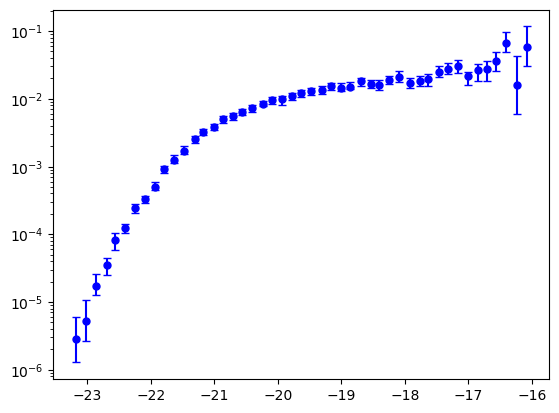

In [483]:
x=datos['MAG']
y=datos['PHI']
error_sup= datos['error_sup']
error_inf= datos['error_inf']
#Los datos de error estan invertidos 

plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3)
plt.yscale('log')
plt.show()

Funcion de likehood $L=\prod \frac{1}{\sigma*sqrt(2*pi)}\exp(\frac{(y-y_(model))²}{2*\sigma²})$ 

Funcion  $\log(L)=A-\sum (y-y_(model))²/2*\sigma²$

Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

Vamos a modelar la funcion schechter primero para 

In [484]:
#Defino la funcion schechter
def schechter(M,phi0,a0,M0):
    a=(0.4)*np.log(10)*phi0
    b=10**((-0.4)*(M-M0)*(a0+1))
    c=np.exp(-10**(-0.4*(M-M0)))
    fun=(a*b*c)
    return(fun)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_15767/1133145756.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


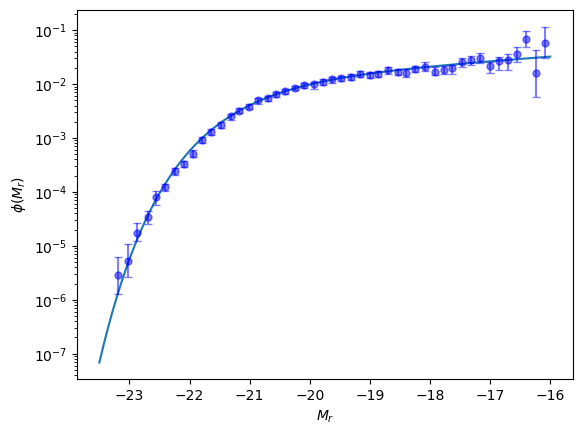

In [485]:
M1=np.linspace(-23.5,-16,100)
plt.plot(M1,schechter(M=M1,phi0=1.46e-2,a0=-1.20,M0=-20.83))
plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3,alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.show()

#Ahora definimos la funcion likehood, prior y probabilidad posterios

In [486]:
sigma= np.abs((datos['error_sup'] + datos['error_inf'])/2) 

In [487]:
def log_likelihood(y, M, phi0, a0, M0, sigma):
    # Calculamos el modelo de Schechter para cada valor de M
    y_model = schechter(M, phi0, a0, M0)
    
    # Calculamos la log-verosimilitud
    logL = -0.5 * np.sum(((y - y_model)**2) / 2*sigma**2)  # La constante A está incluida en la normalización
    return logL

In [488]:
logL = log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma)
print(f"Log-verosimilitud: {logL}")

Log-verosimilitud: -5.324139185214394e-07


In [489]:
log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=0.03, a0=-1.9, M0=-22, sigma=sigma) # Prueba con otros valores

-0.008735834163755259

A medida que los parámetros utilizados se acercan más a los valores predichos por el modelo, el likelihood debe ir aumentando pues se está maximizando.
Para la probabilidad a priori de los parámetros se toma una distribución plana, asumiendo que no se conoce nada de los parámetros. Entonces, esta función devuelve un valor constante si se encuentra dentro de la región que se va a muestrear, mientras que es nula fuera de esa región.

In [490]:
def prior(phi0, a0, M0,phi0lim, M0lim, alim):
    
    if (phi0lim[0]<=phi0) & (phi0<=phi0lim[1]) & (M0lim[0]<=M0) & (M0<=M0lim[1]) & (alim[0]<=a0) & (a0<=alim[1]):
        return 1.0  # Valor constante para la distribución plana
    else:
        return 0.0  # Cero fuera del rango

In [491]:
phi0lim=[0.008,0.035]
M0lim=[-21.20,-20]
alim=[-1.66,-0.66]

In [492]:
phi0 = 1.46e-2
a0 = -1.20
M0 = -20.83

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")


Prior: 1.0


In [493]:
#prueba prior
phi0 = 1.46e-2
a0 = -1.20
M0 = -22

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")

Prior: 0.0


Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

In [494]:
#A continuacion utilizamos el teorema de Bayes para definir la probabilidad posterior
def prob_post(y, M, phi0, a0, M0, sigma,phi0lim, M0lim, alim):
    log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))
    return(log_pos)

In [495]:
# Llamada a la función para calcular la probabilidad posterior
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)



-5.324139185214394e-07

In [496]:
#La llamamos con otros valores 
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=2.9E-2, a0=-1.2, M0=-22, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)


/tmp/ipykernel_15767/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


-inf

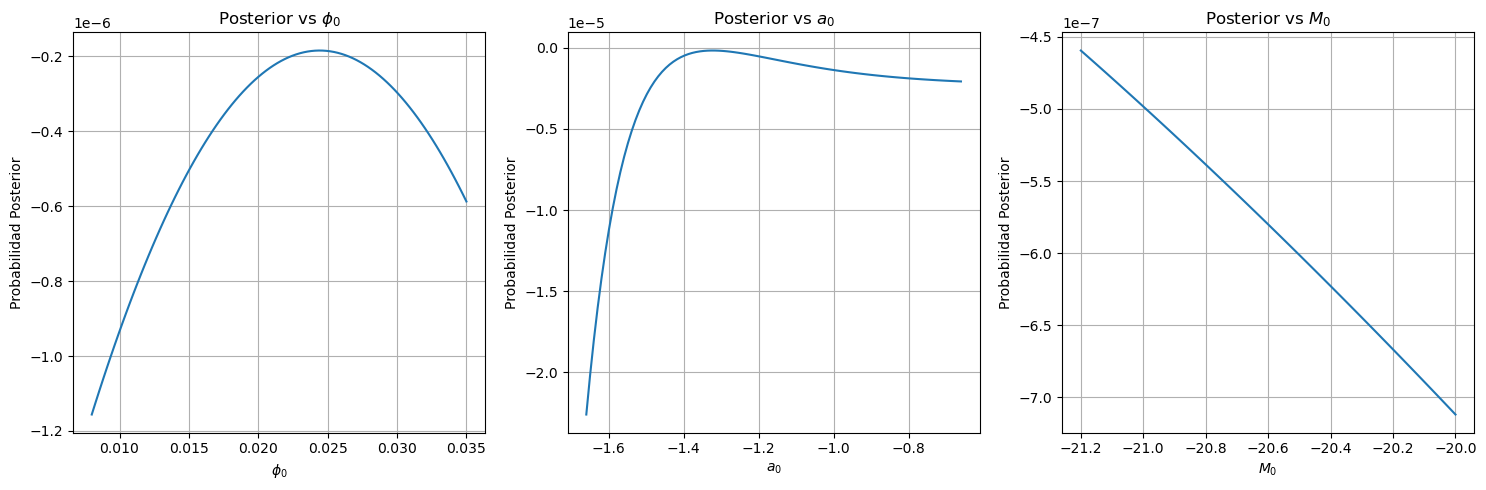

In [497]:
#Se esta maximizando por lo que variando los parametros podemos observar si la funcion esta funcionando bien
# Funciones de verosimilitud, prior y probabilidad posterior ya definidas
# Definiciones de los parámetros de los límites
phi0lim = [0.008, 0.035]
M0lim = [-21.20, -20]
alim = [-1.66, -0.66]

# Valores de ejemplo para phi0, a0 y M0
phi0_values = np.linspace(phi0lim[0], phi0lim[1], 100)
a0_values = np.linspace(alim[0], alim[1], 100)
M0_values = np.linspace(M0lim[0], M0lim[1], 100)

# Inicializar un contenedor para las probabilidades posteriores
posterior_phi0 = np.zeros_like(phi0_values)
posterior_a0 = np.zeros_like(a0_values)
posterior_M0 = np.zeros_like(M0_values)

# Evaluar la probabilidad posterior para cada valor de phi0
for i, phi0 in enumerate(phi0_values):
    posterior_phi0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=-1.20, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de a0
for i, a0 in enumerate(a0_values):
    posterior_a0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=a0, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de M0
for i, M0 in enumerate(M0_values):
    posterior_M0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=M0, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para phi0
plt.subplot(1, 3, 1)
plt.plot(phi0_values, posterior_phi0)
plt.title(r'Posterior vs $\phi_0$')
plt.xlabel(r'$\phi_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para a0
plt.subplot(1, 3, 2)
plt.plot(a0_values, posterior_a0)
plt.title(r'Posterior vs $a_0$')
plt.xlabel(r'$a_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para M0
plt.subplot(1, 3, 3)
plt.plot(M0_values, posterior_M0)
plt.title(r'Posterior vs $M_0$')
plt.xlabel(r'$M_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

plt.tight_layout()
plt.show()


Metropolis-Hasting:
Utilizamos las funciones antes definidas para generar el algoritmo de la cadena, donde busca un punto con una cierta probabilidad, salta a otro punto de manera aleatorea y luego evalurara la funcion likehood en este punto, el cual comparara con el punto anterior, quiero que el valor de mayor a uno, lo que indicaria que el valor es mejor, entonces lo tomo y a partir de ese punto siga recorriendo el espacio de parametros.


In [508]:
#Debo definir la funcion de metropolis hasting
a0=np.random.uniform(alim[0],alim[1])
phi0=np.random.uniform(phi0lim[0],phi0lim[1])
M0=np.random.uniform(M0lim[0],M0lim[1])
y=datos['PHI']
M=datos['MAG']
#Normalizo el a0,M0,phi0 para darle el mismo paso
#a_norm=(a0-alim[0])/(alim[1]-alim[0])
#M0_norm=(M0-M0lim[0])/(M0lim[1]-M0lim[0])
#phi0_norm=(phi0-phi0lim[0])/(phi0lim[1]-phi0lim[0])
#step=1e-2
#Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
#a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
#M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
#phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])

def metropolis_hasting(y=y, M=M, phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim,N_iter=10000):
    p0= prob_post(y=y, M=M, phi0=phi0, a0=a0, M0=M0,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
    posteriores=[]
    
    for i in range(2000):
        p0= prob_post(y=y, M=M, phi0=phi0, a0=a0, M0=M0,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
        step=1e-1
        #print(i)
        #Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
        a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
        M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
        phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])
        p_nueva=prob_post(y=y, M=M, phi0=phi0_nuevo, a0=a_nuevo, M0=M_nuevo,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
        if p_nueva>p0:
            a0=a_nuevo
            M0=M_nuevo
            phi0=phi0_nuevo
            p0=p_nueva
        else:
            u=p_nueva-p0
            r=np.log(np.random.rand())
            if r<u:
                a0=a_nuevo
                M0=M_nuevo
                phi0=phi0_nuevo
                p0=p_nueva
            #Si no se cumple esta condicion, no quiero que haga nada, me quedo en donde estoy
    return(a0,M0,phi0)
print(a0,M0,phi0)
metropolis_hasting(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)



-1.2183522227919497 -20.216460007001604 0.023166931630165356


/tmp/ipykernel_15767/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


(-1.4383267474206745, -20.96500227725414, 0.01700575992250382)

In [499]:
prob_post(y=y, M=M, phi0=phi0, a0=a0, M0=M0,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)


-6.611805976591129e-05